In [18]:
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.examples.tutorials.mnist import input_data

In [135]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [136]:
# parameter 설정
epochs=15
batchsize=100

In [149]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None,28*28])
y = tf.placeholder(tf.float32, [None,10])

w1 = tf.get_variable('w1', shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x,w1)+b1) 

w2 = tf.get_variable('w2', shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2)+b2) 

w3 = tf.get_variable('w3', shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]))
l3 = tf.nn.relu(tf.matmul(l2,w3)+b3) 

w4 = tf.get_variable('w4', shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([256]))
l4 = tf.nn.relu(tf.matmul(l3,w4)+b4) 

w5 = tf.get_variable('w5', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(l4,w5)+b5
### weight 초기화 algorithm
# tf.contrib.layers.xavier_initializer()
# tf.keras.initializers.he_normal()


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

pred =  tf.equal(tf.argmax(hf,axis=1),tf.argmax(y,axis=1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [152]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for epoch in range(epochs):
    avg_cost=0
    batch = int(mnist.train.num_examples/batchsize)
        
    pbar = tqdm(range(batch))
    for i in pbar:
        batchx,batchy = mnist.train.next_batch(batchsize)
        cv,_ = session.run([cost,train], {x:batchx,y:batchy})
        avg_cost += cv/batch
        pbar.set_description('cost:%f' % avg_cost)
print('accuracy : ', session.run(accuracy, {x:mnist.test.images,y:mnist.test.labels}))      


cost:0.105390:  10%|██████▎                                                          | 53/550 [00:00<00:04, 110.48it/s]


cost:0.144876:  23%|██████████████▌                                                 | 125/550 [00:00<00:03, 130.65it/s]


cost:0.176447:  33%|█████████████████████▏                                          | 182/550 [00:01<00:02, 136.38it/s]


cost:0.203389:  44%|████████████████████████████▎                                   | 243/550 [00:01<00:02, 139.88it/s]


cost:0.227757:  55%|███████████████████████████████████▎                            | 304/550 [00:02<00:01, 145.31it/s]


cost:0.250039:  69%|████████████████████████████████████████████▏                   | 380/550 [00:02<00:01, 147.02it/s]


cost:0.269440:  80%|███████████████████████████████████████████████████▍            | 442/550 [00:03<00:00, 147.77it/s]


cost:0.285558:  91%|██████████████████████████████████████████████████████████▌     | 503/550 [00:03<00:00, 145.86it/s]


cost:0.296847: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.04it/s]

cost:0.004329:   3%|█▉                                                               | 16/550 [00:00<00:03, 156.86it/s]


cost:0.018328:  13%|████████▍                                                        | 71/550 [00:00<00:03, 141.06it/s]


cost:0.031037:  27%|█████████████████                                               | 147/550 [00:01<00:02, 147.06it/s]


cost:0.045004:  38%|████████████████████████                                        | 207/550 [00:01<00:02, 147.66it/s]


cost:0.058187:  49%|███████████████████████████████▍                                | 270/550 [00:01<00:01, 150.22it/s]


cost:0.071589:  60%|██████████████████████████████████████▌                         | 331/550 [00:02<00:01, 146.37it/s]


cost:0.082961:  71%|█████████████████████████████████████████████▍                  | 391/550 [00:02<00:01, 140.43it/s]


cost:0.094338:  85%|██████████████████████████████████████████████████████▍         | 468/550 [00:03<00:00, 145.78it/s]


cost:0.106258:  96%|█████████████████████████████████████████████████████████████▏  | 526/550 [00:03<00:00, 138.39it/s]


cost:0.109470: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 138.02it/s]

cost:0.005936:   6%|███▋                                                             | 31/550 [00:00<00:03, 152.76it/s]


cost:0.014721:  20%|████████████▌                                                   | 108/550 [00:00<00:02, 147.46it/s]


cost:0.023151:  30%|███████████████████                                             | 164/550 [00:01<00:02, 139.63it/s]


cost:0.032297:  40%|█████████████████████████▊                                      | 222/550 [00:01<00:02, 139.28it/s]


cost:0.040768:  52%|█████████████████████████████████▏                              | 285/550 [00:02<00:01, 146.80it/s]


cost:0.049971:  66%|██████████████████████████████████████████▏                     | 363/550 [00:02<00:01, 131.83it/s]


cost:0.060020:  76%|████████████████████████████████████████████████▊               | 419/550 [00:03<00:00, 133.31it/s]


cost:0.068734:  87%|███████████████████████████████████████████████████████▊        | 480/550 [00:03<00:00, 144.26it/s]


cost:0.077018: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.27it/s]

cost:0.000564:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.006704:  12%|███████▋                                                         | 65/550 [00:00<00:03, 158.13it/s]


cost:0.012280:  23%|██████████████▊                                                 | 127/550 [00:00<00:02, 152.67it/s]


cost:0.019074:  35%|██████████████████████                                          | 190/550 [00:01<00:02, 151.43it/s]


cost:0.024892:  46%|█████████████████████████████▌                                  | 254/550 [00:01<00:01, 150.15it/s]


cost:0.032466:  58%|████████████████████████████████████▉                           | 317/550 [00:02<00:01, 148.61it/s]


cost:0.039712:  70%|████████████████████████████████████████████▌                   | 383/550 [00:02<00:01, 151.04it/s]


cost:0.046639:  81%|████████████████████████████████████████████████████            | 447/550 [00:03<00:00, 145.70it/s]


cost:0.053217:  92%|██████████████████████████████████████████████████████████▉     | 507/550 [00:03<00:00, 145.53it/s]


cost:0.056320: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.49it/s]

cost:0.002074:   5%|███▎                                                             | 28/550 [00:00<00:03, 136.40it/s]


cost:0.006877:  15%|██████████                                                       | 85/550 [00:00<00:03, 136.63it/s]


cost:0.010802:  28%|██████████████████▏                                             | 156/550 [00:01<00:02, 136.57it/s]


cost:0.015780:  39%|█████████████████████████                                       | 215/550 [00:01<00:02, 138.64it/s]


cost:0.021591:  49%|███████████████████████████████▌                                | 271/550 [00:02<00:02, 138.40it/s]


cost:0.026896:  63%|████████████████████████████████████████                        | 344/550 [00:02<00:01, 142.83it/s]


cost:0.032728:  73%|███████████████████████████████████████████████                 | 404/550 [00:02<00:01, 142.03it/s]


cost:0.037676:  84%|█████████████████████████████████████████████████████▊          | 462/550 [00:03<00:00, 139.84it/s]


cost:0.045054:  97%|██████████████████████████████████████████████████████████████  | 533/550 [00:03<00:00, 140.88it/s]


cost:0.045966: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.95it/s]

cost:0.002500:   8%|█████▍                                                           | 46/550 [00:00<00:03, 148.19it/s]


cost:0.005960:  19%|███████████▉                                                    | 103/550 [00:00<00:03, 141.14it/s]


cost:0.010109:  32%|████████████████████▋                                           | 178/550 [00:01<00:02, 145.48it/s]


cost:0.014744:  43%|███████████████████████████▎                                    | 235/550 [00:01<00:02, 137.67it/s]


cost:0.018260:  53%|██████████████████████████████████▏                             | 294/550 [00:02<00:01, 141.65it/s]


cost:0.023605:  65%|█████████████████████████████████████████▌                      | 357/550 [00:02<00:01, 149.10it/s]


cost:0.028314:  79%|██████████████████████████████████████████████████▍             | 433/550 [00:03<00:00, 148.09it/s]


cost:0.033601:  90%|█████████████████████████████████████████████████████████▎      | 493/550 [00:03<00:00, 142.16it/s]


cost:0.036555: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.71it/s]

cost:0.000281:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.003194:  11%|███████▍                                                         | 63/550 [00:00<00:03, 148.41it/s]


cost:0.007265:  23%|██████████████▋                                                 | 126/550 [00:00<00:02, 150.35it/s]


cost:0.011385:  34%|█████████████████████▉                                          | 188/550 [00:01<00:02, 152.60it/s]


cost:0.015414:  48%|██████████████████████████████▉                                 | 266/550 [00:01<00:01, 144.07it/s]


cost:0.019102:  59%|█████████████████████████████████████▉                          | 326/550 [00:02<00:01, 142.67it/s]


cost:0.022176:  70%|████████████████████████████████████████████▉                   | 386/550 [00:02<00:01, 141.45it/s]


cost:0.026550:  81%|███████████████████████████████████████████████████▉            | 446/550 [00:03<00:00, 140.61it/s]


cost:0.030219:  95%|████████████████████████████████████████████████████████████▌   | 520/550 [00:03<00:00, 139.16it/s]


cost:0.031972: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 138.68it/s]

cost:0.001328:   6%|███▉                                                             | 33/550 [00:00<00:03, 159.88it/s]


cost:0.003699:  17%|██████████▊                                                      | 91/550 [00:00<00:03, 140.27it/s]


cost:0.006275:  29%|██████████████████▋                                             | 161/550 [00:01<00:02, 137.62it/s]


cost:0.009849:  41%|█████████████████████████▉                                      | 223/550 [00:01<00:02, 144.01it/s]


cost:0.014542:  51%|████████████████████████████████▋                               | 281/550 [00:02<00:02, 133.91it/s]


cost:0.016926:  63%|████████████████████████████████████████▏                       | 345/550 [00:02<00:01, 148.23it/s]


cost:0.021079:  74%|███████████████████████████████████████████████▎                | 407/550 [00:02<00:00, 149.51it/s]


cost:0.025779:  85%|██████████████████████████████████████████████████████▎         | 467/550 [00:03<00:00, 141.94it/s]


cost:0.028691:  99%|███████████████████████████████████████████████████████████████ | 542/550 [00:03<00:00, 143.42it/s]


cost:0.028879: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 138.09it/s]

cost:0.001729:   9%|█████▊                                                           | 49/550 [00:00<00:03, 158.05it/s]


cost:0.003808:  20%|████████████▊                                                   | 110/550 [00:00<00:02, 150.52it/s]


cost:0.005529:  31%|████████████████████                                            | 172/550 [00:01<00:02, 143.14it/s]


cost:0.008311:  45%|█████████████████████████████                                   | 250/550 [00:01<00:02, 149.41it/s]


cost:0.011260:  57%|████████████████████████████████████▌                           | 314/550 [00:02<00:01, 149.92it/s]


cost:0.014541:  69%|███████████████████████████████████████████▉                    | 378/550 [00:02<00:01, 151.23it/s]


cost:0.017143:  80%|███████████████████████████████████████████████████▍            | 442/550 [00:02<00:00, 151.65it/s]


cost:0.019926:  92%|██████████████████████████████████████████████████████████▋     | 504/550 [00:03<00:00, 132.94it/s]


cost:0.022552: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 141.10it/s]

cost:0.000513:   3%|█▊                                                               | 15/550 [00:00<00:03, 148.51it/s]


cost:0.002481:  13%|████████▋                                                        | 74/550 [00:00<00:03, 137.00it/s]


cost:0.004407:  27%|████████████████▉                                               | 146/550 [00:01<00:02, 139.63it/s]


cost:0.006460:  37%|███████████████████████▌                                        | 203/550 [00:01<00:02, 139.72it/s]


cost:0.010693:  48%|██████████████████████████████▍                                 | 262/550 [00:01<00:02, 143.06it/s]


cost:0.013100:  61%|███████████████████████████████████████▏                        | 337/550 [00:02<00:01, 143.72it/s]


cost:0.015244:  72%|██████████████████████████████████████████████▏                 | 397/550 [00:02<00:01, 139.41it/s]


cost:0.018697:  83%|█████████████████████████████████████████████████████           | 456/550 [00:03<00:00, 143.98it/s]


cost:0.020817:  94%|████████████████████████████████████████████████████████████▏   | 517/550 [00:03<00:00, 139.09it/s]


cost:0.021517: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 135.63it/s]

cost:0.001013:   6%|███▋                                                             | 31/550 [00:00<00:03, 149.23it/s]


cost:0.003300:  17%|███████████▏                                                     | 95/550 [00:00<00:02, 151.75it/s]


cost:0.005785:  28%|██████████████████                                              | 155/550 [00:01<00:02, 144.09it/s]


cost:0.008334:  42%|██████████████████████████▉                                     | 232/550 [00:01<00:02, 147.81it/s]


cost:0.010813:  53%|██████████████████████████████████                              | 293/550 [00:02<00:01, 143.07it/s]


cost:0.013357:  65%|█████████████████████████████████████████▋                      | 358/550 [00:02<00:01, 152.60it/s]


cost:0.015926:  77%|████████████████████████████████████████████████▉               | 421/550 [00:02<00:00, 140.93it/s]


cost:0.018896:  88%|████████████████████████████████████████████████████████▏       | 483/550 [00:03<00:00, 147.43it/s]


cost:0.022265: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 142.05it/s]

cost:0.000166:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.002307:  12%|███████▌                                                         | 64/550 [00:00<00:03, 153.50it/s]


cost:0.004071:  23%|██████████████▋                                                 | 126/550 [00:00<00:02, 152.29it/s]


cost:0.006311:  34%|█████████████████████▊                                          | 187/550 [00:01<00:02, 145.26it/s]


cost:0.008500:  45%|████████████████████████████▋                                   | 247/550 [00:01<00:02, 141.05it/s]


cost:0.010034:  58%|█████████████████████████████████████                           | 319/550 [00:02<00:01, 131.82it/s]


cost:0.012726:  70%|████████████████████████████████████████████▌                   | 383/550 [00:02<00:01, 144.12it/s]


cost:0.014912:  81%|███████████████████████████████████████████████████▌            | 443/550 [00:03<00:00, 140.60it/s]


cost:0.016620:  91%|██████████████████████████████████████████████████████████▌     | 503/550 [00:03<00:00, 141.07it/s]


cost:0.017825: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 139.10it/s]

cost:0.000454:   3%|█▊                                                               | 15/550 [00:00<00:03, 147.06it/s]


cost:0.002265:  16%|██████████▌                                                      | 89/550 [00:00<00:03, 142.89it/s]


cost:0.004766:  27%|█████████████████                                               | 147/550 [00:01<00:02, 139.95it/s]


cost:0.007001:  37%|███████████████████████▊                                        | 205/550 [00:01<00:02, 134.97it/s]


cost:0.008729:  51%|████████████████████████████████▎                               | 278/550 [00:02<00:01, 138.98it/s]


cost:0.009561:  62%|███████████████████████████████████████▍                        | 339/550 [00:02<00:01, 147.98it/s]


cost:0.011374:  73%|██████████████████████████████████████████████▌                 | 400/550 [00:02<00:01, 141.05it/s]


cost:0.013010:  84%|█████████████████████████████████████████████████████▊          | 462/550 [00:03<00:00, 146.98it/s]


cost:0.014936:  96%|█████████████████████████████████████████████████████████████▏  | 526/550 [00:03<00:00, 150.47it/s]


cost:0.015384: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 137.74it/s]

cost:0.001424:   9%|█████▌                                                           | 47/550 [00:00<00:03, 153.25it/s]


cost:0.002766:  20%|████████████▌                                                   | 108/550 [00:00<00:03, 144.95it/s]


cost:0.003747:  31%|███████████████████▉                                            | 171/550 [00:01<00:02, 149.48it/s]


cost:0.005260:  43%|███████████████████████████▏                                    | 234/550 [00:01<00:02, 150.63it/s]


cost:0.006807:  54%|██████████████████████████████████▋                             | 298/550 [00:02<00:01, 150.24it/s]


cost:0.008312:  66%|██████████████████████████████████████████                      | 362/550 [00:02<00:01, 152.81it/s]


cost:0.010298:  78%|█████████████████████████████████████████████████▋              | 427/550 [00:02<00:00, 152.50it/s]


cost:0.013360:  89%|████████████████████████████████████████████████████████▊       | 488/550 [00:03<00:00, 142.42it/s]


cost:0.015987: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 142.05it/s]

cost:0.000713:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.002269:  11%|███████▍                                                         | 63/550 [00:00<00:03, 149.58it/s]


cost:0.003519:  25%|███████████████▋                                                | 135/550 [00:00<00:03, 131.23it/s]


cost:0.004932:  35%|██████████████████████▎                                         | 192/550 [00:01<00:02, 137.64it/s]


cost:0.006981:  46%|█████████████████████████████▍                                  | 253/550 [00:01<00:02, 142.01it/s]


cost:0.008570:  60%|██████████████████████████████████████▏                         | 328/550 [00:02<00:01, 140.14it/s]


cost:0.009581:  71%|█████████████████████████████████████████████▍                  | 391/550 [00:02<00:01, 148.03it/s]


cost:0.010911:  82%|████████████████████████████████████████████████████▍           | 451/550 [00:03<00:00, 138.81it/s]


cost:0.012091:  92%|██████████████████████████████████████████████████████████▉     | 507/550 [00:03<00:00, 138.51it/s]


cost:0.013071: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 135.80it/s]


accuracy :  0.9784


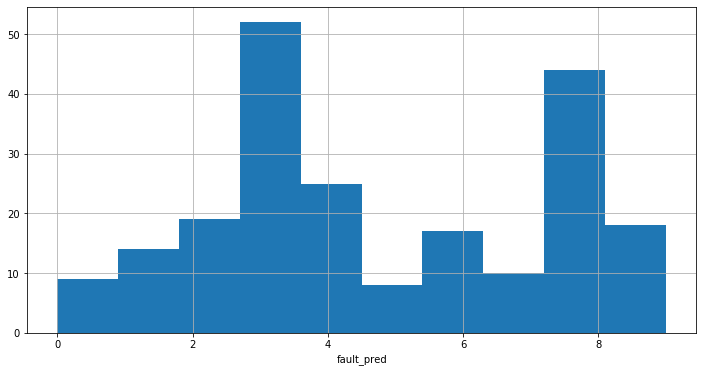

In [153]:
index = []
original = []
pred_list = []
labels = session.run(tf.argmax(mnist.test.labels,1))
preds = session.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images})

for i in range(mnist.test.num_examples):
    if preds[i] != labels[i]:
        index.append(i)
        original.append(labels[i])
        pred_list.append(preds[i])
        
df = pd.DataFrame({'label':original, 'pred': pred_list}, index=index)

plt.figure(figsize=(12,6))
plt.hist(df['pred'], bins=10)
plt.xlabel('fault_pred')
plt.grid()
plt.show()

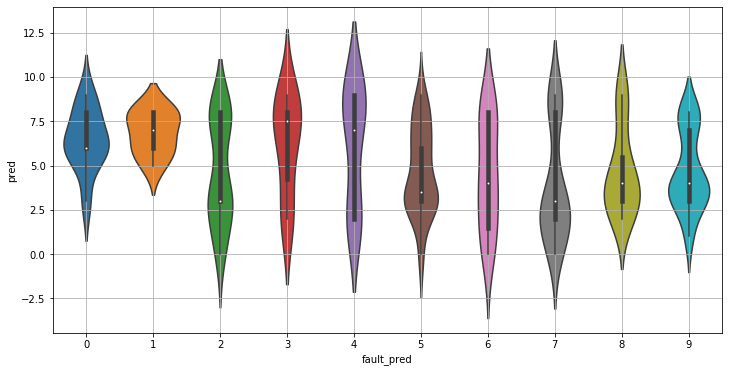

In [154]:
plt.figure(figsize=(12,6))
sns.violinplot(x='label', y='pred', data=df)
plt.xlabel('fault_pred')
plt.grid()
plt.show()

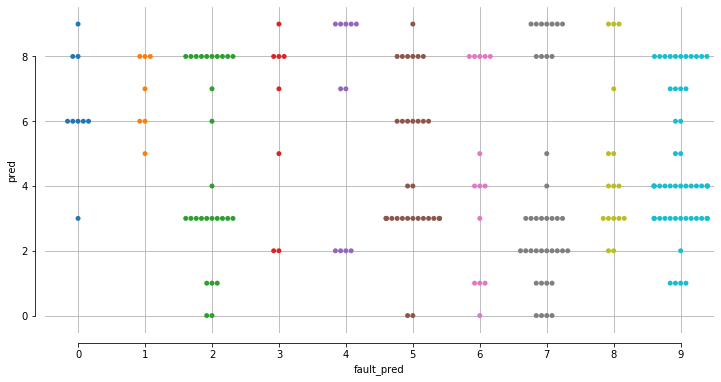

In [155]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='label', y='pred', data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('fault_pred')
plt.grid()
plt.show()

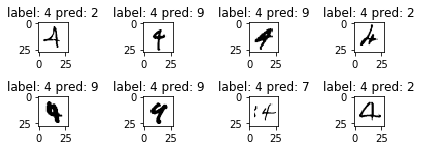

In [156]:
cnt=0
for n in (df.query('label==4').sample(n=8).index):
    cnt+=1
    plt.subplot(4,4,cnt)
    plt.imshow(mnist.test.images[n].reshape(28,28),cmap='Greys')
    t='label: '+str(df['label'][n])+' pred: '+str(df['pred'][n])
    plt.title(t)
plt.tight_layout()
plt.show()

In [158]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None,28*28])
y = tf.placeholder(tf.float32, [None,10])

w1 = tf.get_variable('w1', shape=[784,256], initializer=tf.keras.initializers.he_normal())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x,w1)+b1) 

w2 = tf.get_variable('w2', shape=[256,256], initializer=tf.keras.initializers.he_normal())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1,w2)+b2) 

w3 = tf.get_variable('w3', shape=[256,256], initializer=tf.keras.initializers.he_normal())
b3 = tf.Variable(tf.random_normal([256]))
l3 = tf.nn.relu(tf.matmul(l2,w3)+b3) 

w4 = tf.get_variable('w4', shape=[256,256], initializer=tf.keras.initializers.he_normal())
b4 = tf.Variable(tf.random_normal([256]))
l4 = tf.nn.relu(tf.matmul(l3,w4)+b4) 

w5 = tf.get_variable('w5', shape=[256,10], initializer=tf.keras.initializers.he_normal())
b5 = tf.Variable(tf.random_normal([10]))
hf = tf.matmul(l4,w5)+b5
### weight 초기화 algorithm
# tf.contrib.layers.xavier_initializer()
# tf.keras.initializers.he_normal()


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

pred =  tf.equal(tf.argmax(hf,axis=1),tf.argmax(y,axis=1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [160]:
session = tf.Session()
session.run(tf.global_variables_initializer())
for epoch in range(epochs):
    avg_cost=0
    batch = int(mnist.train.num_examples/batchsize)
        
    pbar = tqdm(range(batch))
    for i in pbar:
        batchx,batchy = mnist.train.next_batch(batchsize)
        cv,_ = session.run([cost,train], {x:batchx,y:batchy})
        avg_cost += cv/batch
        pbar.set_description('cost:%f' % avg_cost)
print('accuracy : ', session.run(accuracy, {x:mnist.test.images,y:mnist.test.labels}))  


cost:0.103930:  10%|██████▍                                                          | 54/550 [00:00<00:04, 109.51it/s]


cost:0.142527:  21%|█████████████▍                                                  | 116/550 [00:00<00:03, 136.28it/s]


cost:0.171576:  35%|██████████████████████                                          | 190/550 [00:01<00:02, 137.66it/s]


cost:0.197402:  45%|████████████████████████████▉                                   | 249/550 [00:01<00:02, 144.85it/s]


cost:0.220560:  56%|███████████████████████████████████▉                            | 309/550 [00:02<00:01, 140.66it/s]


cost:0.240547:  67%|██████████████████████████████████████████▉                     | 369/550 [00:02<00:01, 139.08it/s]


cost:0.258674:  81%|███████████████████████████████████████████████████▌            | 443/550 [00:03<00:00, 141.58it/s]


cost:0.275727:  91%|██████████████████████████████████████████████████████████▍     | 502/550 [00:03<00:00, 136.36it/s]


cost:0.285538: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 133.85it/s]

cost:0.004544:   3%|█▉                                                               | 16/550 [00:00<00:03, 160.00it/s]


cost:0.016775:  14%|█████████▎                                                       | 79/550 [00:00<00:03, 154.57it/s]


cost:0.028842:  25%|████████████████▏                                               | 139/550 [00:01<00:02, 146.27it/s]


cost:0.040622:  36%|███████████████████████▏                                        | 199/550 [00:01<00:02, 141.95it/s]


cost:0.053147:  50%|████████████████████████████████                                | 275/550 [00:01<00:01, 137.73it/s]


cost:0.064823:  61%|██████████████████████████████████████▉                         | 335/550 [00:02<00:01, 143.83it/s]


cost:0.077261:  72%|█████████████████████████████████████████████▉                  | 395/550 [00:02<00:01, 142.25it/s]


cost:0.088906:  83%|█████████████████████████████████████████████████████           | 456/550 [00:03<00:00, 145.78it/s]


cost:0.100541:  95%|████████████████████████████████████████████████████████████▌   | 520/550 [00:03<00:00, 149.97it/s]


cost:0.103361: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 140.52it/s]

cost:0.005803:   6%|███▉                                                             | 33/550 [00:00<00:03, 158.27it/s]


cost:0.015164:  18%|███████████▌                                                     | 98/550 [00:00<00:02, 154.56it/s]


cost:0.022800:  29%|██████████████████▋                                             | 161/550 [00:01<00:02, 147.11it/s]


cost:0.030705:  43%|███████████████████████████▋                                    | 238/550 [00:01<00:02, 144.31it/s]


cost:0.039631:  55%|███████████████████████████████████▏                            | 302/550 [00:02<00:01, 149.24it/s]


cost:0.048504:  64%|████████████████████████████████████████▊                       | 351/550 [00:02<00:01, 155.84it/s]


cost:0.056915:  75%|████████████████████████████████████████████████▎               | 415/550 [00:02<00:00, 153.31it/s]


cost:0.065014:  89%|█████████████████████████████████████████████████████████▏      | 491/550 [00:03<00:00, 142.62it/s]


cost:0.071561: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 141.75it/s]

cost:0.000640:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.005513:  11%|███████                                                          | 60/550 [00:00<00:03, 146.08it/s]


cost:0.012031:  24%|███████████████▎                                                | 132/550 [00:00<00:02, 140.53it/s]


cost:0.019344:  35%|██████████████████████▌                                         | 194/550 [00:01<00:02, 145.67it/s]


cost:0.024948:  46%|█████████████████████████████▌                                  | 254/550 [00:01<00:02, 141.56it/s]


cost:0.031992:  57%|████████████████████████████████████▌                           | 314/550 [00:02<00:01, 141.42it/s]


cost:0.038114:  68%|███████████████████████████████████████████▊                    | 376/550 [00:02<00:01, 139.58it/s]


cost:0.044932:  82%|████████████████████████████████████████████████████▌           | 452/550 [00:03<00:00, 147.38it/s]


cost:0.051876:  93%|███████████████████████████████████████████████████████████▌    | 512/550 [00:03<00:00, 142.02it/s]


cost:0.055016: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.95it/s]

cost:0.001936:   6%|███▋                                                             | 31/550 [00:00<00:03, 147.90it/s]


cost:0.005979:  17%|██████████▊                                                      | 91/550 [00:00<00:03, 143.89it/s]


cost:0.010318:  27%|█████████████████▌                                              | 151/550 [00:01<00:02, 146.32it/s]


cost:0.015343:  39%|████████████████████████▉                                       | 214/550 [00:01<00:02, 150.64it/s]


cost:0.020655:  51%|████████████████████████████████▎                               | 278/550 [00:01<00:01, 150.70it/s]


cost:0.026127:  62%|███████████████████████████████████████▊                        | 342/550 [00:02<00:01, 153.66it/s]


cost:0.031015:  74%|███████████████████████████████████████████████▍                | 408/550 [00:02<00:00, 155.88it/s]


cost:0.034796:  86%|██████████████████████████████████████████████████████▊         | 471/550 [00:03<00:00, 147.54it/s]


cost:0.040330:  97%|██████████████████████████████████████████████████████████████▏ | 534/550 [00:03<00:00, 150.50it/s]


cost:0.040798: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.57it/s]

cost:0.003329:   9%|█████▋                                                           | 48/550 [00:00<00:03, 156.34it/s]


cost:0.006170:  20%|█████████████                                                   | 112/550 [00:00<00:02, 154.70it/s]


cost:0.010560:  31%|████████████████████                                            | 172/550 [00:01<00:02, 143.92it/s]


cost:0.014148:  45%|████████████████████████████▋                                   | 246/550 [00:01<00:02, 133.60it/s]


cost:0.018404:  56%|███████████████████████████████████▉                            | 309/550 [00:02<00:01, 142.39it/s]


cost:0.022891:  67%|██████████████████████████████████████████▊                     | 368/550 [00:02<00:01, 141.47it/s]


cost:0.026306:  78%|█████████████████████████████████████████████████▊              | 428/550 [00:03<00:00, 141.81it/s]


cost:0.031769:  89%|█████████████████████████████████████████████████████████       | 490/550 [00:03<00:00, 148.06it/s]


cost:0.035470: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 138.85it/s]

cost:0.000775:   3%|█▊                                                               | 15/550 [00:00<00:03, 149.99it/s]


cost:0.004510:  14%|█████████▏                                                       | 78/550 [00:00<00:03, 150.71it/s]


cost:0.007323:  25%|███████████████▉                                                | 137/550 [00:00<00:02, 144.00it/s]


cost:0.010694:  35%|██████████████████████▌                                         | 194/550 [00:01<00:02, 138.76it/s]


cost:0.014284:  46%|█████████████████████████████▌                                  | 254/550 [00:01<00:02, 143.81it/s]


cost:0.017735:  58%|█████████████████████████████████████                           | 319/550 [00:02<00:01, 150.82it/s]


cost:0.021897:  70%|████████████████████████████████████████████▌                   | 383/550 [00:02<00:01, 153.23it/s]


cost:0.025424:  81%|████████████████████████████████████████████████████            | 447/550 [00:03<00:00, 150.78it/s]


cost:0.030772:  93%|███████████████████████████████████████████████████████████▌    | 512/550 [00:03<00:00, 155.83it/s]


cost:0.032550: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.27it/s]

cost:0.001750:   6%|███▋                                                             | 31/550 [00:00<00:03, 154.44it/s]


cost:0.004610:  17%|███████████                                                      | 94/550 [00:00<00:02, 152.42it/s]


cost:0.008507:  28%|██████████████████▏                                             | 156/550 [00:01<00:02, 145.52it/s]


cost:0.010283:  40%|█████████████████████████▋                                      | 221/550 [00:01<00:02, 152.32it/s]


cost:0.014127:  52%|█████████████████████████████████▏                              | 285/550 [00:01<00:01, 153.05it/s]


cost:0.017911:  63%|████████████████████████████████████████▌                       | 349/550 [00:02<00:01, 152.45it/s]


cost:0.021132:  75%|████████████████████████████████████████████████▎               | 415/550 [00:02<00:00, 157.39it/s]


cost:0.024313:  87%|███████████████████████████████████████████████████████▋        | 479/550 [00:03<00:00, 146.49it/s]


cost:0.027361: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.98it/s]

cost:0.000028:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.002418:  11%|██████▊                                                          | 58/550 [00:00<00:03, 142.51it/s]


cost:0.004575:  22%|█████████████▊                                                  | 119/550 [00:00<00:02, 147.73it/s]


cost:0.006905:  35%|██████████████████████▏                                         | 191/550 [00:01<00:02, 137.83it/s]


cost:0.009688:  46%|█████████████████████████████▏                                  | 251/550 [00:01<00:02, 145.44it/s]


cost:0.011846:  57%|████████████████████████████████████▏                           | 311/550 [00:02<00:01, 142.37it/s]


cost:0.015936:  67%|███████████████████████████████████████████▏                    | 371/550 [00:02<00:01, 140.82it/s]


cost:0.019312:  79%|██████████████████████████████████████████████████▌             | 434/550 [00:03<00:00, 150.03it/s]


cost:0.022948:  93%|███████████████████████████████████████████████████████████▏    | 509/550 [00:03<00:00, 134.24it/s]


cost:0.024773: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.27it/s]

cost:0.000622:   3%|█▉                                                               | 16/550 [00:00<00:03, 150.94it/s]


cost:0.001972:  14%|████████▉                                                        | 76/550 [00:00<00:03, 147.34it/s]


cost:0.003917:  25%|████████████████                                                | 138/550 [00:01<00:02, 149.91it/s]


cost:0.006753:  39%|█████████████████████████                                       | 215/550 [00:01<00:02, 147.56it/s]


cost:0.009330:  51%|████████████████████████████████▍                               | 279/550 [00:01<00:01, 152.34it/s]


cost:0.011966:  62%|███████████████████████████████████████▉                        | 343/550 [00:02<00:01, 152.32it/s]


cost:0.014682:  74%|███████████████████████████████████████████████▏                | 406/550 [00:02<00:00, 144.81it/s]


cost:0.018013:  86%|██████████████████████████████████████████████████████▉         | 472/550 [00:03<00:00, 153.98it/s]


cost:0.020828:  97%|██████████████████████████████████████████████████████████████▎ | 536/550 [00:03<00:00, 154.68it/s]


cost:0.021360: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.98it/s]

cost:0.001501:   9%|█████▌                                                           | 47/550 [00:00<00:03, 154.14it/s]


cost:0.003446:  20%|████████████▊                                                   | 110/550 [00:00<00:02, 152.11it/s]


cost:0.005837:  32%|████████████████████▏                                           | 174/550 [00:01<00:02, 150.53it/s]


cost:0.008936:  43%|███████████████████████████▏                                    | 234/550 [00:01<00:02, 143.94it/s]


cost:0.011052:  53%|██████████████████████████████████▏                             | 294/550 [00:02<00:01, 136.87it/s]


cost:0.013650:  65%|█████████████████████████████████████████▎                      | 355/550 [00:02<00:01, 141.13it/s]


cost:0.015960:  78%|██████████████████████████████████████████████████▏             | 431/550 [00:02<00:00, 143.24it/s]


cost:0.018805:  89%|█████████████████████████████████████████████████████████▏      | 491/550 [00:03<00:00, 141.05it/s]


cost:0.021976: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 139.38it/s]

cost:0.000290:   0%|                                                                           | 0/550 [00:00<?, ?it/s]


cost:0.002777:  13%|████████▌                                                        | 72/550 [00:00<00:03, 137.93it/s]


cost:0.004732:  24%|███████████████▏                                                | 131/550 [00:00<00:02, 142.92it/s]


cost:0.006682:  35%|██████████████████████▍                                         | 193/550 [00:01<00:02, 137.97it/s]


cost:0.010502:  46%|█████████████████████████████▍                                  | 253/550 [00:01<00:02, 140.30it/s]


cost:0.013135:  57%|████████████████████████████████████▌                           | 314/550 [00:02<00:01, 144.12it/s]


cost:0.015184:  71%|█████████████████████████████████████████████▍                  | 390/550 [00:02<00:01, 142.46it/s]


cost:0.017368:  82%|████████████████████████████████████████████████████▌           | 452/550 [00:03<00:00, 149.99it/s]


cost:0.019304:  94%|████████████████████████████████████████████████████████████    | 516/550 [00:03<00:00, 151.38it/s]


cost:0.019764: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 139.17it/s]

cost:0.000496:   6%|███▋                                                             | 31/550 [00:00<00:03, 154.83it/s]


cost:0.001492:  16%|██████████▋                                                      | 90/550 [00:00<00:03, 141.68it/s]


cost:0.002411:  28%|█████████████████▉                                              | 154/550 [00:01<00:02, 152.38it/s]


cost:0.004217:  40%|█████████████████████████▌                                      | 220/550 [00:01<00:02, 155.67it/s]


cost:0.006394:  52%|█████████████████████████████████                               | 284/550 [00:01<00:01, 139.69it/s]


cost:0.007558:  63%|████████████████████████████████████████▎                       | 346/550 [00:02<00:01, 146.58it/s]


cost:0.009360:  74%|███████████████████████████████████████████████▎                | 407/550 [00:02<00:00, 147.78it/s]


cost:0.010827:  86%|██████████████████████████████████████████████████████▊         | 471/550 [00:03<00:00, 152.51it/s]


cost:0.013610:  97%|█████████████████████████████████████████████████████████████▉  | 532/550 [00:03<00:00, 144.17it/s]


cost:0.013657: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 141.97it/s]

cost:0.002346:   8%|█████▍                                                           | 46/550 [00:00<00:03, 150.90it/s]


cost:0.003957:  22%|█████████████▊                                                  | 119/550 [00:00<00:03, 142.67it/s]


cost:0.006383:  33%|█████████████████████                                           | 181/550 [00:01<00:02, 150.03it/s]


cost:0.008876:  44%|████████████████████████████▏                                   | 242/550 [00:01<00:02, 143.48it/s]


cost:0.011677:  55%|███████████████████████████████████▏                            | 302/550 [00:02<00:01, 141.32it/s]


cost:0.013260:  66%|██████████████████████████████████████████                      | 362/550 [00:02<00:01, 142.81it/s]


cost:0.015042:  80%|███████████████████████████████████████████████████             | 439/550 [00:03<00:00, 137.43it/s]


cost:0.017318:  91%|█████████████████████████████████████████████████████████▉      | 498/550 [00:03<00:00, 140.39it/s]


cost:0.019140: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:04<00:00, 136.75it/s]

cost:0.000666:   3%|█▊                                                               | 15/550 [00:00<00:03, 145.63it/s]


cost:0.002219:  14%|████████▊                                                        | 75/550 [00:00<00:03, 142.70it/s]


cost:0.003612:  24%|███████████████▎                                                | 132/550 [00:01<00:02, 140.38it/s]


cost:0.005457:  36%|███████████████████████                                         | 198/550 [00:01<00:02, 155.42it/s]


cost:0.008345:  48%|██████████████████████████████▍                                 | 262/550 [00:01<00:01, 153.63it/s]


cost:0.010444:  59%|█████████████████████████████████████▉                          | 326/550 [00:02<00:01, 146.17it/s]


cost:0.011492:  71%|█████████████████████████████████████████████▏                  | 388/550 [00:02<00:01, 149.55it/s]


cost:0.012694:  82%|████████████████████████████████████████████████████▌           | 452/550 [00:03<00:00, 151.83it/s]


cost:0.013760:  94%|████████████████████████████████████████████████████████████    | 516/550 [00:03<00:00, 153.05it/s]


cost:0.013948: 100%|████████████████████████████████████████████████████████████████| 550/550 [00:03<00:00, 143.83it/s]


accuracy :  0.9804


In [ ]:
### mnist keras

In [84]:
from keras.datasets import mnist
(trainimage,trainlabel),(testimage,testlabel) = mnist.load_data()

In [85]:
testimage.shape

(10000, 28, 28)

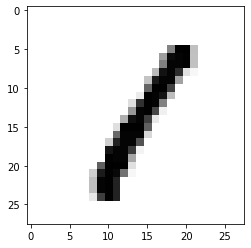

In [86]:
digit = trainimage[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [87]:
model2 = Sequential()
model2.add(Dense(512,input_shape=(28*28,), activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [88]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

trainimage = trainimage.reshape((60000,28*28)).astype('float32')/255
testimage = testimage.reshape((10000,28*28)).astype('float32')/255

In [89]:
from keras.utils import to_categorical
trainlabel = to_categorical(trainlabel)
testlabel = to_categorical(testlabel)

In [90]:
model2.fit(trainimage, trainlabel,epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - ETA: 57s - loss: 2.4379 - accuracy: 0.039 - ETA: 10s - loss: 1.4303 - accuracy: 0.575 - ETA: 6s - loss: 1.0898 - accuracy: 0.682 - ETA: 5s - loss: 0.9031 - accuracy: 0.73 - ETA: 4s - loss: 0.7937 - accuracy: 0.77 - ETA: 4s - loss: 0.7319 - accuracy: 0.79 - ETA: 4s - loss: 0.6760 - accuracy: 0.80 - ETA: 3s - loss: 0.6319 - accuracy: 0.81 - ETA: 3s - loss: 0.5989 - accuracy: 0.82 - ETA: 3s - loss: 0.5706 - accuracy: 0.83 - ETA: 3s - loss: 0.5492 - accuracy: 0.84 - ETA: 3s - loss: 0.5262 - accuracy: 0.85 - ETA: 3s - loss: 0.5072 - accuracy: 0.85 - ETA: 3s - loss: 0.4929 - accuracy: 0.85 - ETA: 3s - loss: 0.4783 - accuracy: 0.86 - ETA: 2s - loss: 0.4668 - accuracy: 0.86 - ETA: 2s - loss: 0.4539 - accuracy: 0.87 - ETA: 2s - loss: 0.4410 - accuracy: 0.87 - ETA: 2s - loss: 0.4304 - accuracy: 0.87 - ETA: 2s - loss: 0.4185 - accuracy: 0.87 - ETA: 2s - loss: 0.4102 - accuracy: 0.88 - ETA: 2s - loss: 0.4035 - accuracy: 0.88 - ETA: 2s - loss

60000/60000 [==============================] - ETA: 3s - loss: 0.0893 - accuracy: 0.96 - ETA: 3s - loss: 0.0729 - accuracy: 0.97 - ETA: 3s - loss: 0.0688 - accuracy: 0.97 - ETA: 3s - loss: 0.0633 - accuracy: 0.97 - ETA: 3s - loss: 0.0671 - accuracy: 0.97 - ETA: 3s - loss: 0.0665 - accuracy: 0.97 - ETA: 2s - loss: 0.0658 - accuracy: 0.97 - ETA: 2s - loss: 0.0650 - accuracy: 0.97 - ETA: 2s - loss: 0.0647 - accuracy: 0.97 - ETA: 2s - loss: 0.0707 - accuracy: 0.97 - ETA: 2s - loss: 0.0693 - accuracy: 0.97 - ETA: 2s - loss: 0.0710 - accuracy: 0.97 - ETA: 2s - loss: 0.0719 - accuracy: 0.97 - ETA: 2s - loss: 0.0715 - accuracy: 0.97 - ETA: 2s - loss: 0.0701 - accuracy: 0.97 - ETA: 2s - loss: 0.0686 - accuracy: 0.97 - ETA: 2s - loss: 0.0673 - accuracy: 0.98 - ETA: 2s - loss: 0.0677 - accuracy: 0.97 - ETA: 2s - loss: 0.0674 - accuracy: 0.97 - ETA: 2s - loss: 0.0674 - accuracy: 0.97 - ETA: 2s - loss: 0.0673 - accuracy: 0.97 - ETA: 2s - loss: 0.0685 - accuracy: 0.97 - ETA: 2s - loss: 0.0684 - accu

In [94]:
model2.evaluate(testimage, testlabel)[1]

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 48us/step


0.9804999828338623

In [ ]:
## 영화 리뷰 분류

In [162]:
from keras.datasets import imdb
(traindata,trainlabel),(testdata,testlabel) = imdb.load_data(num_words=10000)

In [163]:
print(max([max(seq) for seq in traindata]))

9999


In [164]:
wordindex = imdb.get_word_index()

In [165]:
rev_wordindex = dict([(value,key) for (key,value) in wordindex.items()])

In [166]:
# 불필요한 단어 제거
review0 = ' '.join([rev_wordindex.get(i-3, '?') for i in traindata[0]])

In [ ]:
# 동일한 길이의 리스트가 되도록 padding 
# 원핫인코당

In [167]:
def vec_seq(data, dim=10000):
    res = np.zeros((len(data),dim))
    for  i, s in enumerate(data):
        res[i,s] = 1
    return res
    
xtrain = vec_seq(traindata)
xtest= vec_seq(testdata)

In [169]:
print(xtrain.shape, xtest.shape)

(25000, 10000) (25000, 10000)


In [119]:
ytrain = trainlabel.astype('float32')
ytest = testlabel.astype('float32')

In [121]:
##  model 만들기
model = Sequential()
model.add(Dense(16,input_shape=(10000,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [122]:
# 환경 설정
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [123]:
# 검증 data 추출
xval = xtrain[:10000]
p_xtrain = xtrain[10000:]

yval = ytrain[:10000]
p_ytrain = ytrain[10000:]

In [127]:
history = model.fit(p_xtrain, p_ytrain, epochs=20, batch_size=512, validation_data=(xval,yval))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0051 - accuracy: 1.00 - ETA: 1s - loss: 0.0065 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0049 - accuracy: 0.99 - ETA: 1s - loss: 0.0048 - accuracy: 0.99 - ETA: 1s - loss: 0.0054 - accuracy: 0.99 - ETA: 1s - loss: 0.0054 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 1s - loss: 0.0058 - accuracy: 0.99 - ETA: 1s - loss: 0.0058 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 1s - loss: 0.0057 - accuracy: 0.99 - ETA: 0s - loss: 0.0057 - accuracy: 0.99 - ETA: 0s - loss: 0.0057 - accuracy: 0.99 - ETA: 0s - loss: 0.0056 - accuracy: 0.99 - ETA: 0s - loss: 0.0055 - accuracy: 0.99 - ETA: 0s - loss: 0.0055 - accuracy: 0.99 - ETA: 0s - loss: 0.0059 - accuracy: 0.99 - ETA: 0s - loss: 0.0058 - accuracy: 0.99 - ETA: 0s - 

Epoch 7/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0019 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0023 - accuracy: 0.99 - ETA: 1s - loss: 0.0024 - accuracy: 0.99 - ETA: 1s - loss: 0.0024 - accuracy: 0.99 - ETA: 0s - loss: 0.0023 - accuracy: 0.99 - ETA: 0s - loss: 0.0025 - accuracy: 0.99 - ETA: 0s - loss: 0.0025 - accuracy: 0.99 - ETA: 0s - loss: 0.0025 - accuracy: 0.99 - ETA: 0s - loss: 0.0026 - accuracy: 0.99 - ETA: 0s - loss: 0.0028 - accuracy: 0.99 - ETA: 0s - loss: 0.0028 - accuracy: 0.99 - ETA: 0s - loss: 0.0027 - accuracy: 0.99 - ETA: 0s - loss: 0.0027 - accuracy: 0.99 - ETA: 0s - loss: 0.0026 - accuracy: 0.99 - ETA: 0s - loss: 0.

Epoch 13/20
15000/15000 [==============================] - ETA: 1s - loss: 0.0022 - accuracy: 1.00 - ETA: 1s - loss: 0.0015 - accuracy: 1.00 - ETA: 1s - loss: 0.0015 - accuracy: 1.00 - ETA: 1s - loss: 0.0013 - accuracy: 1.00 - ETA: 1s - loss: 0.0012 - accuracy: 1.00 - ETA: 1s - loss: 0.0011 - accuracy: 1.00 - ETA: 1s - loss: 0.0011 - accuracy: 1.00 - ETA: 1s - loss: 0.0012 - accuracy: 1.00 - ETA: 1s - loss: 0.0011 - accuracy: 1.00 - ETA: 1s - loss: 0.0012 - accuracy: 1.00 - ETA: 1s - loss: 0.0012 - accuracy: 1.00 - ETA: 1s - loss: 0.0012 - accuracy: 1.00 - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - ETA: 0s - loss: 0.0013 - accuracy: 1.00 - ETA: 0s - loss: 0.0015 - accuracy: 0.99 - ETA: 0s - loss: 0.0016 - accuracy: 0.99 - ETA: 0s - loss: 0.0016 - accuracy: 0.99 - ETA: 0s - loss: 0.0016 - accuracy: 0.99 - ETA: 0s - loss: 0.0016 - accuracy: 0.99 - ETA: 0s - loss: 0.0016 - accuracy: 0.99 - ETA: 0s - loss: 0

15000/15000 [==============================] - ETA: 1s - loss: 9.1861e-04 - accuracy: 1.00 - ETA: 1s - loss: 9.0983e-04 - accuracy: 1.00 - ETA: 1s - loss: 0.0018 - accuracy: 0.9993   - ETA: 1s - loss: 0.0018 - accuracy: 0.99 - ETA: 1s - loss: 0.0015 - accuracy: 0.99 - ETA: 1s - loss: 0.0013 - accuracy: 0.99 - ETA: 1s - loss: 0.0014 - accuracy: 0.99 - ETA: 1s - loss: 0.0013 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0.0012 - accuracy: 0.99 - ETA: 0s - loss: 0

In [128]:
historydict = history.history

In [129]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

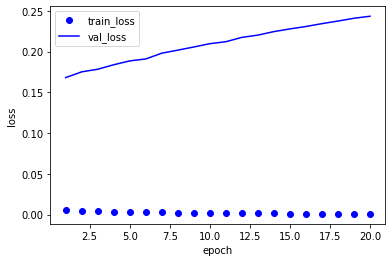

In [130]:
epo = range(1, len(accuracy)+1)
plt.plot(epo, loss, 'bo', label='train_loss')
plt.plot(epo, val_loss, 'b', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

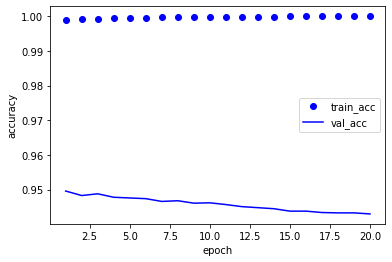

In [131]:
plt.plot(epo, accuracy, 'bo', label='train_acc')
plt.plot(epo, val_accuracy, 'b', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [133]:
model.evaluate(xtest, ytest)[1]

25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 133us/step


0.8650400042533875

In [134]:
model.predict(xtest)

array([[9.6756220e-04],
       [1.0000000e+00],
       [9.8700345e-01],
       ...,
       [1.2589097e-03],
       [1.8039346e-04],
       [4.9728447e-01]], dtype=float32)